In [3]:
pwd

'/content'

In [28]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
!pip install matplotlib
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
!unzip "/content/drive/MyDrive/Garbage Dataset 1.zip"

Streaming output truncated to the last 5000 lines.
  inflating: split-garbage-dataset/test/cardboard/cardboard63.jpg  
  inflating: split-garbage-dataset/test/cardboard/cardboard69.jpg  
  inflating: split-garbage-dataset/test/cardboard/cardboard71.jpg  
  inflating: split-garbage-dataset/test/cardboard/cardboard73.jpg  
  inflating: split-garbage-dataset/test/cardboard/cardboard8.jpg  
  inflating: split-garbage-dataset/test/cardboard/cardboard88.jpg  
  inflating: split-garbage-dataset/test/cardboard/cardboard89.jpg  
  inflating: split-garbage-dataset/test/cardboard/cardboard9.jpg  
  inflating: split-garbage-dataset/test/cardboard/cardboard92.jpg  
  inflating: split-garbage-dataset/test/cardboard/cardboard98.jpg  
  inflating: split-garbage-dataset/test/glass/glass10.jpg  
  inflating: split-garbage-dataset/test/glass/glass118.jpg  
  inflating: split-garbage-dataset/test/glass/glass119.jpg  
  inflating: split-garbage-dataset/test/glass/glass12.jpg  
  inflating: split-garbage-da

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [34]:
#setting parameter for image data augmentation to the training data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

In [35]:
#image data augmentation to the testing data.
val_datagen = ImageDataGenerator(rescale = 1./255)

In [36]:
train_transform = train_datagen.flow_from_directory(r"/content/train",
                                                    target_size=(128,128),
                                                    batch_size=64,
                                                    class_mode='categorical')

Found 1768 images belonging to 6 classes.


In [37]:
test_transform = val_datagen.flow_from_directory(r"/content/test",
                                                    target_size=(128,128),
                                                    batch_size=64,
                                                    class_mode='categorical')

Found 431 images belonging to 6 classes.


In [38]:
#to define linear initializations import sequential
from tensorflow.keras.models import Sequential
#to add layers import dense
from tensorflow.keras.layers import Dense
#to create a convolution kernel import convolution2D
from tensorflow.keras.layers import Convolution2D
#adding maxpooling layer
from tensorflow.keras.layers import MaxPooling2D
#adding flatten layer
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam

In [39]:
model=Sequential()

In [40]:
model=Sequential()
#First convolution layer and pooling
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(2,2))

In [41]:
#Second convolution layer and pooling
model.add(Convolution2D(64,(3,3),padding='same',activation='relu'))
#input shape is going to be the pooled feature maps from the previous convolution.
model.add(MaxPooling2D(pool_size=2))

In [42]:
#Third convolution layer 
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

In [43]:
#Fourth convolution layer
model.add(Convolution2D(32,(3,3),padding='same',activation='relu'))
#input shape is going to be the pooled feature maps from the previous convolution
model.add(MaxPooling2D(pool_size=2))

In [44]:
#Flattening the layer
model.add(Flatten())

In [45]:
#Adding first hidden layer
model.add(Dense(kernel_initializer='uniform',activation='relu',units=150))
#Adding second hidden layer
model.add(Dense(kernel_initializer='uniform',activation='relu',units=68))
model.add(Dense(kernel_initializer='uniform',activation='softmax',units=6))

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)      

In [47]:
# compiling the CNN model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [49]:
res = model.fit_generator(train_transform,steps_per_epoch=len(train_transform),validation_steps=len(test_transform),epochs=30,validation_data=test_transform)

<ipython-input-49-0d679ed29cf2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  res = model.fit_generator(train_transform,steps_per_epoch=len(train_transform),validation_steps=len(test_transform),epochs=30,validation_data=test_transform)


Epoch 1/30
28/28 [==============================] - 15s 522ms/step - loss: 1.7089 - acc: 0.2166 - val_loss: 1.6959 - val_acc: 0.2506
Epoch 2/30
28/28 [==============================] - 13s 468ms/step - loss: 1.6358 - acc: 0.3122 - val_loss: 1.6168 - val_acc: 0.2738
Epoch 3/30
28/28 [==============================] - 13s 445ms/step - loss: 1.5312 - acc: 0.3286 - val_loss: 1.5358 - val_acc: 0.3573
Epoch 4/30
28/28 [==============================] - 14s 493ms/step - loss: 1.5204 - acc: 0.3258 - val_loss: 1.4999 - val_acc: 0.3689
Epoch 5/30
28/28 [==============================] - 13s 468ms/step - loss: 1.5495 - acc: 0.3150 - val_loss: 1.4891 - val_acc: 0.3179
Epoch 6/30
28/28 [==============================] - 14s 491ms/step - loss: 1.4673 - acc: 0.3614 - val_loss: 1.4375 - val_acc: 0.3735
Epoch 7/30
28/28 [==============================] - 14s 508ms/step - loss: 1.4139 - acc: 0.3931 - val_loss: 1.3801 - val_acc: 0.4130
Epoch 8/30
28/28 [==============================] - 13s 463ms/step - 

In [50]:
model.save('Garbage_1.h5')

In [52]:
!tar -zcvf GarbageWeights.tgz Garbage_1.h5

Garbage_1.h5


IBM DEPLOYMENT

In [53]:
!pip install watson-machine-learning-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
!pip install ibm_watson_machine_learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://eu-de.ml.cloud.ibm.com",
    "apikey":"0A9wSRPj3vMnAyRVk_axXLc7Jhrz1xwIdQtBYj05k1y1"
}
client=APIClient(wml_credentials)

In [56]:
client

In [57]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  --------------------  ------------------------
ID                                    NAME                  CREATED
01cc8328-ce2f-45b9-860e-fe6dbdbda620  Garbage_class_deploy  2023-05-23T14:33:40.045Z
------------------------------------  --------------------  ------------------------


,ID,NAME,CREATED
0,01cc8328-ce2f-45b9-860e-fe6dbdbda620,Garbage_class_deploy,2023-05-23T14:33:40.045Z


To create a deployment space

In [58]:
space_uid="01cc8328-ce2f-45b9-860e-fe6dbdbda620"

In [59]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  --------------------  ------------------------
ID                                    NAME                  CREATED
01cc8328-ce2f-45b9-860e-fe6dbdbda620  Garbage_class_deploy  2023-05-23T14:33:40.045Z
------------------------------------  --------------------  ------------------------


,ID,NAME,CREATED
0,01cc8328-ce2f-45b9-860e-fe6dbdbda620,Garbage_class_deploy,2023-05-23T14:33:40.045Z


In [60]:
client.set.default_space(space_uid)

'SUCCESS'

In [61]:
client.software_specifications.list(200)

-------------------------------  ------------------------------------  ----  ------------------  --------------------------
NAME                             ID                                    TYPE  STATE               REPLACEMENT
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base  unsupported         runtime-22.2-py3.10
autoai-ts_rt23.1-py3.10          01ce9391-1a79-5a33-94fb-2e134337f314  base  not_provided
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base  not_provided
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base  not_provided
tensorflow_rt23.1-py3.10         079a91e0-245f-5269-8926-3c20b28f37dc  base  not_provided
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base  unsupported         runtime-22.2-py3.10
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base  unsupported
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base  create-

,NAME,ID,TYPE,STATE,REPLACEMENT
0,default_py3.6,0062b8c9-8b7d-44a0-a9b9-46c416adcbd9,base,unsupported,runtime-22.2-py3.10
1,autoai-ts_rt23.1-py3.10,01ce9391-1a79-5a33-94fb-2e134337f314,base,not_provided,
2,kernel-spark3.2-scala2.12,020d69ce-7ac1-5e68-ac1a-31189867356a,base,not_provided,
3,pytorch-onnx_1.3-py3.7-edt,069ea134-3346-5748-b513-49120e15d288,base,not_provided,
4,tensorflow_rt23.1-py3.10,079a91e0-245f-5269-8926-3c20b28f37dc,base,not_provided,
...,...,...,...,...,...
102,runtime-22.2-r4.2,ec0a3d28-08f7-556c-9674-ca7c2dba30bd,base,supported,
103,tensorflow_rt22.2-py3.10,f65bd165-f057-55de-b5cb-f97cf2c0f393,base,supported,
104,do_20.1,f686cdd9-7904-5f9d-a732-01b0d6b10dc5,base,supported,
105,scikit-learn_0.19-py3.6,f963fa9d-4bb7-5652-9c5d-8d9289ef6ad9,base,unsupported,runtime-22.2-py3.10


In [62]:
software_space_uid=client.software_specifications.get_uid_by_name("runtime-22.2-py3.10")

In [63]:
software_space_uid

'b56101f1-309d-549b-a849-eaa63f77b2fb'

In [64]:
model_details = client.repository.store_model(model='GarbageWeights.tgz', meta_props={
    client.repository.ModelMetaNames.NAME: "GarbageDemo",
    client.repository.ModelMetaNames.TYPE: "tensorflow_2.9",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_space_uid
})


In [65]:
model_id=client.repository.get_model_id(model_details)

In [66]:
model_id

'e48877d2-e83b-430c-9cbb-3ac7f91f1ca9'

In [67]:
client.repository.download(model_id,'Garbage_class.tgz')

Successfully saved model content to file: 'Garbage_class.tgz'


'/content/Garbage_class.tgz'

TESTING THE MODEL

In [74]:
from keras import models
models.load_model('Garbage_1.h5')

In [97]:
from tensorflow.keras.utils import load_img, img_to_array
from keras.preprocessing import image
import keras.utils as image
from numpy.lib.shape_base import expand_dims
img = image.load_img(r"/content/valid/plastic/plastic101.jpg",target_size=(128,128))

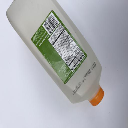

In [98]:
img

In [99]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis =0)
x.shape

                    

(1, 128, 128, 3)

In [100]:
pred =np.argmax(model.predict(x), axis = 1)
pred


1/1 [==============================] - 0s 28ms/step


array([4])

In [101]:
print(pred)

[4]


In [102]:
index = ['cardboard','glass','metal','paper','plastic','trash']


In [103]:
a = index[pred[0]]
print(a)

plastic
